# Programación para la Bioinformática

Unidad 3: Librerías científicas en Python - Matplotlib - Ejercicios
------------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 3. Bajo estas lineas encontrareis ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)

In [ ]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

###**Ejercicios de entrenamiento**



### **Ejercicicio 1**


Haced un gráfico en el que se vea la progresión del rmsd a lo largo del tiempo, de los pasos de una dinámica molecular. Los valores de RMSD y los pasos de tiempo se encuentran en el fichero msd_uoc.dat. La primera columna corresponde a los pasos de tiempo, la segunda al backbone de la proteina, la tercera al substrato y la cuarta al centro activo.

El gráfico tiene que tener definido:

* Titulo en el eje x e y (con un tamaño de la letra de 14)
* Leyenda
* Cambiáis los colores predeterminados para cada columna dibujada

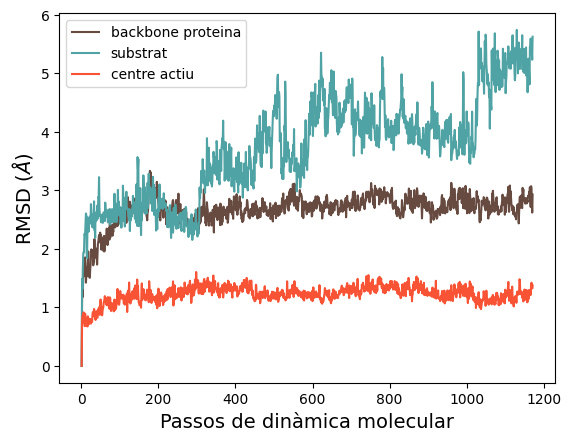

In [ ]:
# Ejecutad primero esta celda para obtener el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/rmsd_uoc.dat --no-check-certificate

File ‘rmsd_uoc.dat’ already there; not retrieving.



<>:22: SyntaxWarning: invalid escape sequence '\A'
<>:22: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipython-input-2025530908.py:22: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel("RMSD ($\AA$)", fontsize=14)


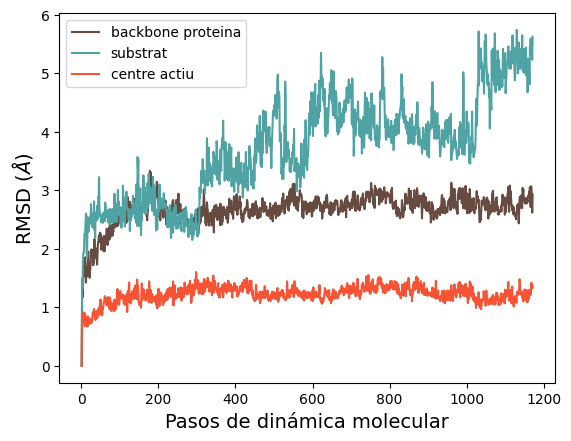

In [ ]:
# para poder visualizar el grafico en este notebook
%matplotlib inline

# importamos los módulos necesarios
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def leer_rmsd(fichero_rmsd):
  # Usamos la función de numpy loadtxt() para que ente crei una array directamente
  # desde un fichero de texto. Podéis encontrar como funciona en el siguiente enlace:
  # https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
  rmsd = np.loadtxt(fichero_rmsd)
  return rmsd

# guardamos en una array de numpy el fichero rmsd_uoc.dat utilizando la función
# creada en el ejercicio 3
rmsd_dinamica = leer_rmsd("rmsd_uoc.dat")

# Añadimos los nombres de los ejes y la leyenda correspondiente
plt.xlabel("Pasos de dinámica molecular", fontsize=14)
plt.ylabel("RMSD ($\AA$)", fontsize=14)
# definimos los codigos de colores que queremos
colors = ["#674A40", "#50A3A4", "#F95335"]

# Encontramos el numero totoal de columnas en el fichero
total_columnas = len(rmsd_dinamica[0])
# Creamos el eje x que corresponde a la primera columna del fichero
pasos_dinamica = rmsd_dinamica[:,0]

# dibujamos cada columna y definimos su color a aprtir de la lista de colores
for idx, columna in enumerate(np.arange(1,total_columnas)):
  plt.plot(pasos_dinamica, rmsd_dinamica[:,columna], color=colors[idx])

# indicamos la leyenda en el gráfico
plt.legend(["backbone proteina", "substrat", "centre actiu"])
plt.show()


### **Ejercicicio 2**

Haced un gráfico en que se vea el rmsd del backbone de la proteína y el del centro activo en forma de histograma a lo largo de la trayectoria. El gráfico tiene que cumplir las siguientes condiciones:

* Tenéis que tener dos subplots por cada sistema.
* Los dos subplots tienen que compartir el mismo eje de las y
* Lo primero plot tiene que tener transparencia y tiene que ser de color verde rellenado
* El segundo plot solo tiene que tener la línea del histograma de color rojol

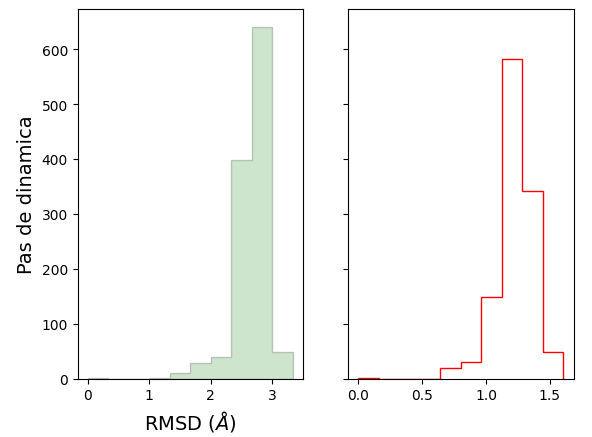


<>:14: SyntaxWarning: invalid escape sequence '\A'
<>:14: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipython-input-3815015721.py:14: SyntaxWarning: invalid escape sequence '\A'
  axs[0].set_xlabel("RMSD ($\AA$)", fontsize=14)


(array([  1.,   0.,   0.,   0.,  19.,  31., 148., 582., 342.,  48.]),
 array([0.        , 0.16056812, 0.32113624, 0.48170435, 0.64227247,
        0.80284059, 0.96340871, 1.12397683, 1.28454494, 1.44511306,
        1.60568118]),
 [<matplotlib.patches.Polygon at 0x7f1ff7db6cf0>])

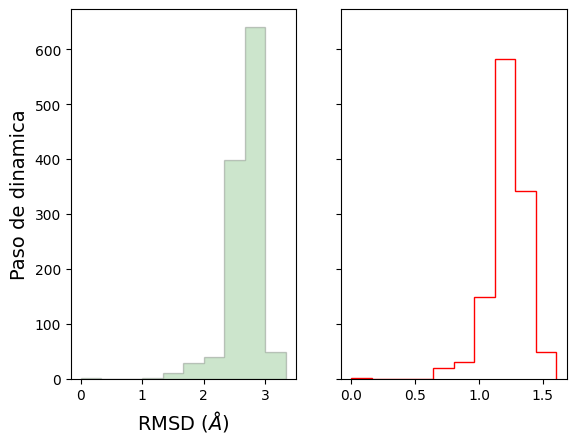

In [ ]:
# para poder visualizar el grafico en este notebook
%matplotlib inline

rmsd_dinamica = leer_rmsd("rmsd_uoc.dat")
# Creamos el array del rmsd del backbone de la proteina
rmsd_dinamica_bbprot = rmsd_dinamica[:,1]
# Creamos el array del rmsd del centro activo
rmsd_dinamica_centroactivo = rmsd_dinamica[:,3]

# creamos los subplots
fig, axs = plt.subplots(1, 2, sharey=True)

# Añadimnos los nombres de los ejes
axs[0].set_xlabel("RMSD ($\AA$)", fontsize=14)
axs[0].set_ylabel("Paso de dinamica", fontsize=14)

# definimos los plots de histograma
axs[0].hist(rmsd_dinamica_bbprot, histtype="stepfilled", facecolor="green", alpha=0.2, edgecolor="black")
axs[1].hist(rmsd_dinamica_centroactivo, histtype="step", edgecolor="red")

### **Ejercicicio 3**



Existen una gran variedad de base de datos para todos los tipos de sistemas biológicos en que estemos interesados. Una de ellas es la base de datos llamada **CAZy** (http://www.cazy.org/), en que podemos encontrar descritas todas las familias de módulos catalíticos y de unión de carbohidratos relacionados estructuralmente (o dominios funcionales) de enzimas que degradan, modifican o crean enlaces glicosídicos, denominados **CAZymes**.

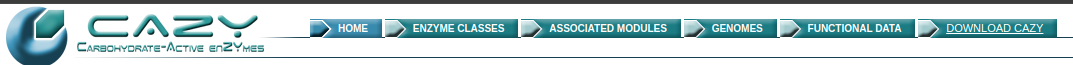

Aparte de consultar directamente la proteína en la que estemos interesados, podemos analizar este conjunto de datos descargándolas desde la página web. En este fichero podemos encontrar varías columnas con información diversa.

* **Primera columna**: Nombre de la clase de CAZyme, seguido con número de la familia a la cual pertenece
* **Segunda columna**: tipo de organismo donde se ha encontrado (Eukariota, bacteria...)
* **Tercera columna**: Organizme exacto donde se ha encontrado
* **Siguientes columnas**: Número de clasificación y en qué bases de datos se pueden encontrar.

Descargaréis un archivo denominado **cazy_fecha_*Aspergillus.txt* en que por motivos de medida, se ha dejado solo la información por los organismos Aspergillus.

In [ ]:
# Ejecutad primero esta celda pàra descargar el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/cazy_data_Aspergillus.txt --no-check-certificate

File ‘cazy_data_Aspergillus.txt’ already there; not retrieving.



En este ejercicio tendremos que crear dos funciones en que las suyas características tienen que ser las siguientes:
* **es_digit()**: Creáis una función en que la variable de entrada se puede corresponder a un texto en que hay letras y números y tiene que devolver solo las letras en una sola variable en formato de string.
* **clasifica_classes_CAZymes()**: Creáis una función en que la variable de entrada sea un fichero de texto descargado de la base de datos CAZy y que clasifique en un diccionario, las clases de CAZymes que hay en aquel fichero y sus valores se corresponden a la cantidad existente por cada clase.

Finalmente, feudo un gráfico de diagrama de sectores (o pie chart en ángulos) en que se vean los porcentajes para cada clase, tal y como se ve en la siguiente figura.


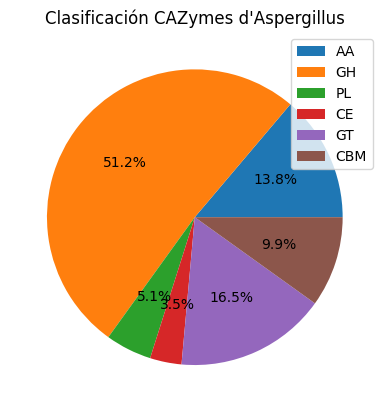

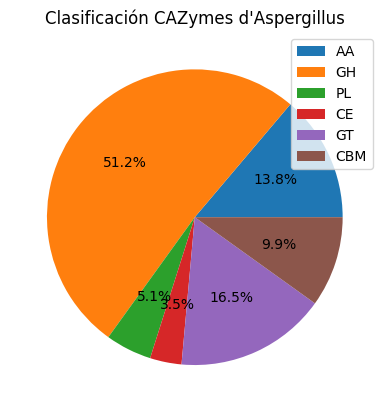

In [ ]:
# para poder visualizar el gráàfico en este notebook
%matplotlib inline

# importamos los módulos necessarios
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def es_digit(data):
  # Función que encuentra si un valor de un string es un digito o no, y solamente develve
  # los valores correspondientes a las letras
  classes = ""
  for value in data:
    # por cada valor de la variable de entrada comprueba si se un digit
    if value.isdigit():
      # si lo es, se acaba el bucle
      break
    else:
      # si no lo es, avamos añadiendo letras a la variable classes
      classes += value
  return classes


def clasifica_classes_CAZymes(data):
  # Función en que creamos un diccionario en que las keys sueño el tipo de clases
  # que pueden llegar a existir por los CAZymes y los valores se corresponde a la
  # cantidad existente de estas clases.
  CAZymes = {}
  with open(data, "r") as infile:
    for line in infile:
      # a primera columna encontramos el nombre de la clase con el número de familia
      # a la que corresponde
      first_column = line.split()[0]
      # Solo nos interesa el nombre de la clase, por lo tanto llamaremos a la función para
      # extraer solo las letras y excluir los digitos correspondientes a la
      # familia
      classes = es_digit(first_column)
      # Si la key correspondiente a la classe ya existe al diccionario CAZymes,
      # suma 1 a su valor correspondiente
      try:
        CAZymes[classes] += 1
        # Si sale la excepción KeyError debido a que la key todavía no existe al
        # diccionario, crea la key con un valor de 1.
      except KeyError:
        CAZymes[classes] = 1
  return CAZymes

input_file = "cazy_data_Aspergillus.txt"
classes = clasifica_classes_CAZymes(input_file)


# Hagamos el gráfico de los resultados obtenidos en forma de diagrama de sectores o "pie
# chart" en ángulos.
# El módulo autopct nos pondrá los porcentajes correspondientes a cada sector del
# diagrama
plt.pie(classes.values(), autopct='%1.1f%%')
# indicamos la leyenda y el título del gráfico
plt.title("Clasificación CAZymes d'Aspergillus")
plt.legend(classes.keys(), loc="best")
# dibujamos el gráfico
plt.show()



###**Ejercicios evaluables**

**IMPORTANTE:** Recordad que es necesaria la línea

```python
%matplotlib inline
```
al principio de cada celdilla de código para que podáis visualizar los gráficos en este notebook.

### Ejercicio 1 **<font color="green" size="+2">MU</font>**

Representad en un único gráfico los valores de `RMSD` que obtenemos del mismo sistema durante dos réplicas (guardadas en las variables **rmsd_1** y **rmsd_2**) de dinámica molecular:

La representación debe dar una imagen como la siguiente:

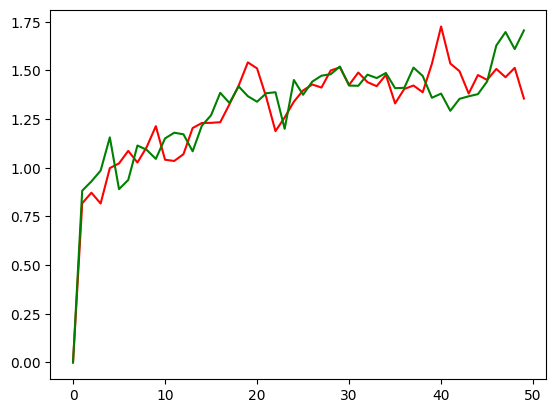

<>:22: SyntaxWarning: invalid escape sequence '\A'
<>:22: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipython-input-2569726318.py:22: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel("RMSD ($\AA$)")


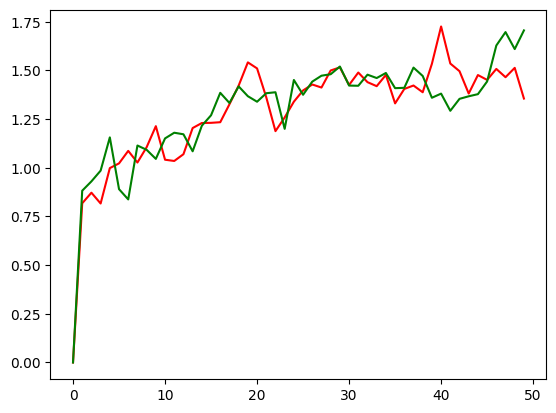

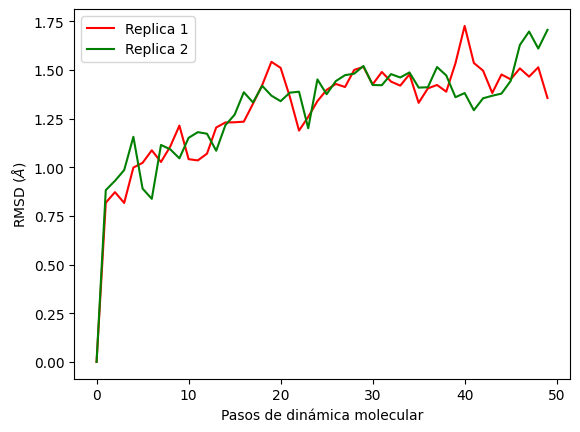

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

rmsd_1 = [0.0, 0.8179, 0.8722, 0.8167, 0.9986, 1.0228, 1.0871, 1.0272, 1.106, 1.214, 1.0416, 1.0352, 1.0699, 1.2043, 1.2302, 1.2311, 1.2343, 1.3265, 1.4224, 1.5417, 1.5107, 1.3624, 1.1884, 1.2587, 1.3398, 1.3975, 1.428, 1.4124, 1.5001, 1.5159, 1.4257, 1.4895, 1.4401, 1.4194, 1.4773, 1.331, 1.4052, 1.4228, 1.3882, 1.5344, 1.7261, 1.5357, 1.4964, 1.3815, 1.4766, 1.4516, 1.508, 1.4655, 1.5135, 1.3558]
rmsd_2 = [0.0, 0.8825, 0.9304, 0.9855, 1.1564, 0.8904, 0.8377, 1.1146, 1.0925, 1.0459, 1.1511, 1.1803, 1.1723, 1.0849, 1.2163, 1.2699, 1.3853, 1.3331, 1.4182, 1.3679, 1.3395, 1.3832, 1.3882, 1.2002, 1.4512, 1.3753, 1.4428, 1.4732, 1.4808, 1.5204, 1.4225, 1.4215, 1.4785, 1.4612, 1.4872, 1.4092, 1.411, 1.5148, 1.4719, 1.3599, 1.3812, 1.293, 1.3543, 1.3675, 1.3784, 1.4436, 1.6283, 1.6973, 1.61, 1.7059]

# Calculamos el eje x que se corresponde al número de pasos de dinámica molecular
# en que tenemos la información de RMSD
x = np.arange(0, len(rmsd_1), 1)

# Representamos los dos rmsd en un solo plot
plt.plot(x, rmsd_1, 'r', x, rmsd_2, 'g')

# Finalmente, mostramos el gráfico
plt.show()

# Podemos añadir también los nombres de los ejes y la leyenda correspondiente
plt.xlabel("Pasos de dinámica molecular")
plt.ylabel("RMSD ($\AA$)")

# Representamos los dos rmsd en un solo plot
plt.plot(x, rmsd_1, 'r', x, rmsd_2, 'g')
plt.legend(["Replica 1", "Replica 2"])

plt.show()

### Ejercicio 2 **<font color="blue" size="+2">EG</font>**

Representa en un gráfico 3D la función `f(x,y) = 4*cos(x) + 3*sin(y)` en el intervalo `[-2(pi/2), 2(pi/2)]` (en radianes) con un step de `0.05`

Podéis consultar ejemplos de graficos 3D aquí: https://matplotlib.org/stable/plot_types/index.html

In [ ]:
# La representación debe dar una imagen como la siguiente

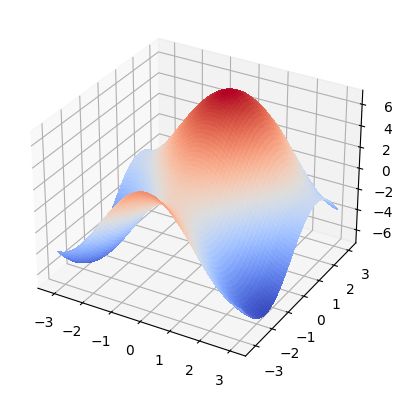

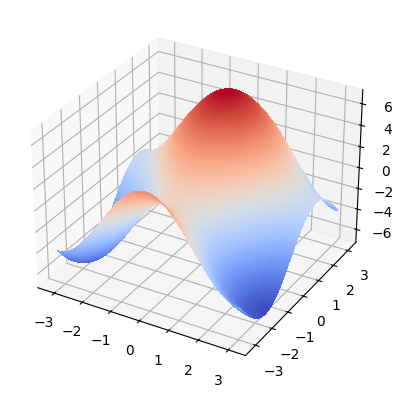

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Esta es la resolución a la que vamos a representar. A valores más
# próximos a 0, el resultado será más exacto, pero también tardará
# más en representarse el gráfico debido a la cantidad de
# puntos a representar:
step = 0.05

# Definimos el vector de rangos de x e y:
x = np.arange(-2*(np.pi/2), 2*(np.pi/2), step)
y = np.arange(-2*(np.pi/2), 2*(np.pi/2), step)
# Una vez definidos, creamos la cuadrícula de valores del eje x por el eje y:
x, y = np.meshgrid(x, y)
# Calculamos el valor de la función que habíamos
f = 4*np.cos(x) + 3*np.sin(y)

# Invocamos al objeto figura que nos permitirá configurar sus ejes, título, etc:
fig = plt.figure()
# Creamos una nueva figura en formato 3D. El 111 es una forma de indicarle
# a matplotlib que solo queremos una
# figura (podríamos representar varias a la misma vez).
ax = fig.add_subplot(111, projection='3d')

# Representamos la función mediante una superfície que se
# encarga de calcular plot_surface().
# Hay algunos parámetros interesantes, como el mapa de colores utilizado (cmap).
# Podéis echar un vistazo a la documentación para conocer más estos parámetros:
# http://matplotlib.org/api/pyplot_summary.html
surf = ax.plot_surface(x, y, f, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=False)

# Finalmente, mostramos el gráfico:
plt.show()

### Ejercicio 3 **<font color="blue" size="+2">EG</font>**
Representa la función que quieras de la forma que consideres. Sé creativo a la hora de escoger la función a representar y el intervalo de valores.

Podéis consultar https://matplotlib.org/stable/plot_types/index.html para inspiraros.

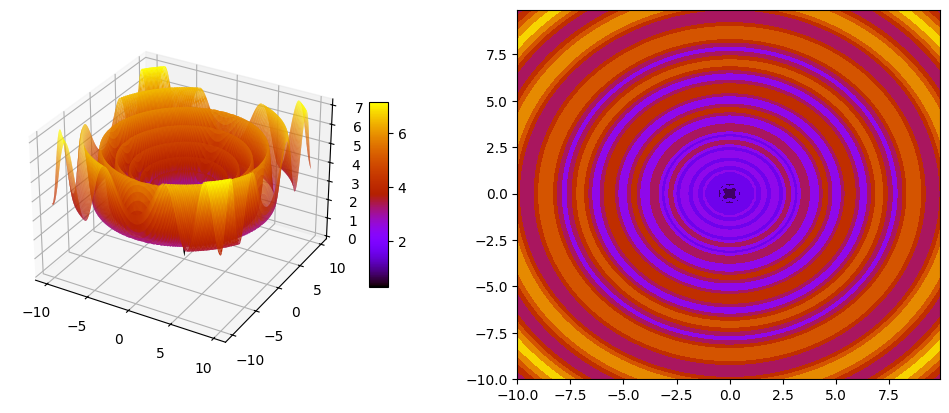

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

step = 0.1

# Creamos la figura, con un ratio de aspecto 0.4 para que se visualicen
# mejor ambos gráficos:
fig = plt.figure(figsize=plt.figaspect(0.4))

# La primera figura mostrará una superfície en 3D:
ax = fig.add_subplot(1, 2, 1, projection='3d')
x = np.arange(-10, 10, step)
y = np.arange(-10, 10, step)
x, y = np.meshgrid(x, y)
z = (x*x + y*y)**0.25 * (np.sin(50.0*(x*x + y*y)**0.1)**2 + 1.0)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot',
                       linewidth=0, antialiased=True)

# Mostraremos una leyenda con los valores a la derecha de la primera figura
fig.colorbar(surf, shrink=0.5, aspect=10)

# La segunda figura, que se mostrará a la derecha de la primera,
# mostrará el contorno de la función:
ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(x, y, z, cmap='gnuplot')

# Mostramos el gráfico:
plt.show()

### Ejercicio 4 **<font color="green" size="+2">MU</font>**

Dados los siguientes datos procedentes de una dinámica molecular de una proteína, representad en uno o varios gráficos los valores máximos, mínimos y medios de la distancia entre un átomo del sustrato y diferentes aminoácidos de la proteína. Representad también, el r.m.s.f correspondiente para cada aminoácido.

_El root mean square fluctuation (r.m.s.f.) es una medida numérica que mide la flexibilidad individual de diferentes partículas a lo largo de una trayectoria de dinámica molecular. Esta medida normalmente nos sirve para encontrar qué aminoácidos son los que más contribuyen en el movimiento de la proteína._

Las posiciones del vector **datos_dinamica** son las siguientes:

* Número aminoácido
* Valor máximo distancia entre sustrato y aminoácido (Å)
* Valor mínimo distancia entre sustrato y aminoácido (Å)
* Valor medio distancia entre sustrato y aminoácido (Å)
* Valor r.m.s.f. (Å)

In [ ]:
# La representación ha de retornar gráficos similares a los siguientes:

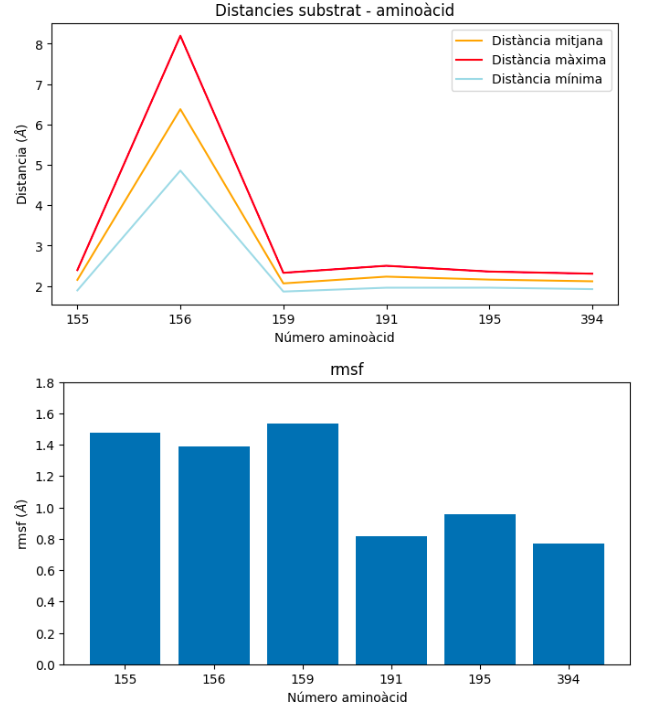

<>:27: SyntaxWarning: invalid escape sequence '\A'
<>:39: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\A'
<>:39: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipython-input-4116752853.py:27: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('Distancia ($\AA$)')
/tmp/ipython-input-4116752853.py:39: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('rmsf ($\AA$)')


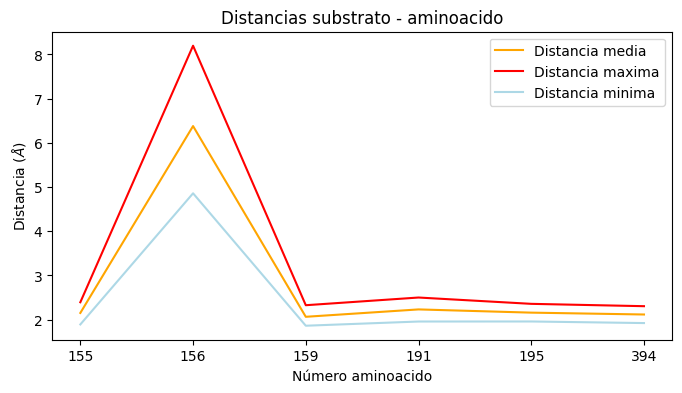

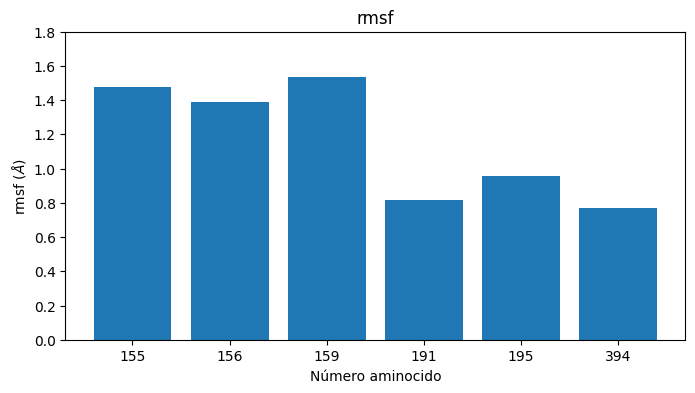

In [ ]:
from matplotlib import figure
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

datos_dinamica = [["155", 2.394, 1.892, 2.152, 1.478],
                  ["156", 8.198, 4.859, 6.380, 1.389],
                  ["159", 2.327, 1.863, 2.065, 1.535],
                  ["191", 2.501, 1.958, 2.232, 0.815],
                  ["195", 2.358, 1.959, 2.159, 0.959],
                  ["394", 2.305, 1.923, 2.117, 0.768]]

# Primero organizamos los datos
aminoacidos = [x[0] for x in datos_dinamica]
dist_max = [x[1] for x in datos_dinamica]
dist_min = [x[2] for x in datos_dinamica]
dist_media = [x[3] for x in datos_dinamica]
rmsf = [x[4] for x in datos_dinamica]

# Representaremos en un primer gráfico las distancias
plt.figure(figsize=(8,4))
p1 = plt.plot(aminoacidos, dist_media, color='orange')
p2 = plt.plot(aminoacidos, dist_max, color='red')
p3 = plt.plot(aminoacidos, dist_min, color='lightblue')

plt.ylabel('Distancia ($\AA$)')
plt.xlabel("Número aminoacido")
plt.title('Distancias substrato - aminoacido')
plt.xticks(aminoacidos)
plt.legend(["Distancia media", "Distancia maxima", "Distancia minima"])

plt.show()

# Representarem ara el r.m.s.f.
plt.figure(figsize=(8,4))
plt.bar(aminoacidos, rmsf)

plt.ylabel('rmsf ($\AA$)')
plt.xlabel("Número aminocido")
plt.title("rmsf")
plt.xticks(aminoacidos)
plt.yticks(np.arange(0, 2, 0.2))

plt.show()

**Autoria**

Autores/as que han participado colectivamente en esta obra:


*   Pau Andrio Balado
*   Brian Jiménez García
*   Melchor Sanchez Martinez
*   Alba Nin Hill
* Xavier Grau-Bové

**Fecha de creación**


*   Ultima modificación: Octubre 2025